In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["Dates"])

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Explore

### Explore Dates

In [3]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


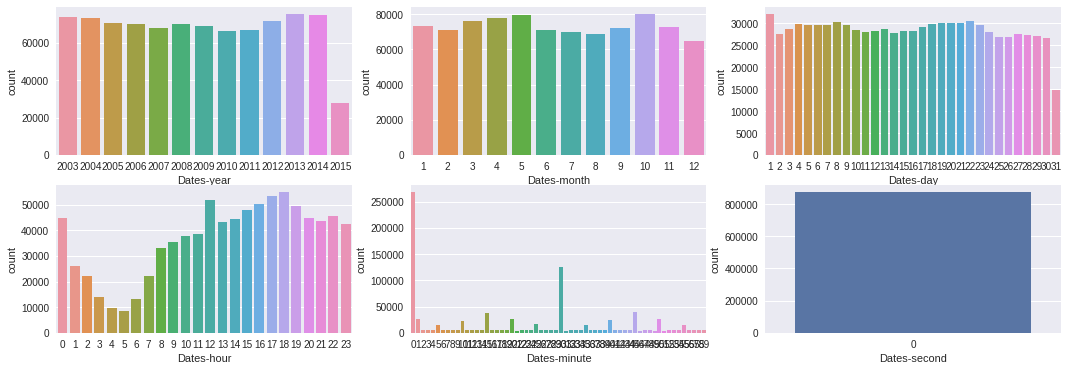

In [4]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 6)

sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

** Lesson Learned **
  * Dates-second는 기록되고 있지 않다. 그러므로 사용하지 않아도 무방하다.

### Explore Date-minute

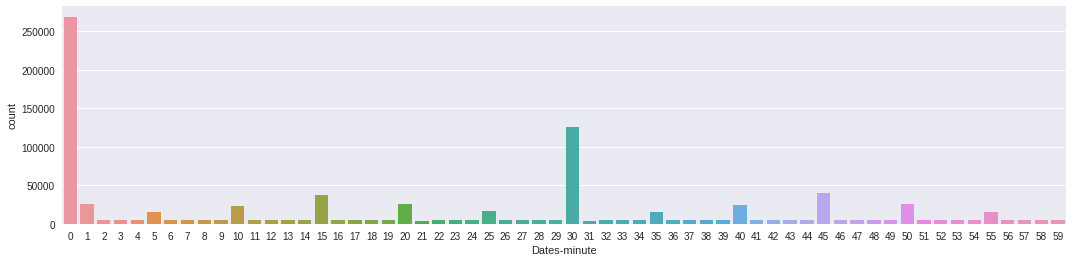

In [5]:
figure, ax = plt.subplots(nrows=1)
figure.set_size_inches(18, 4)

sns.countplot(data=train, x="Dates-minute", ax=ax)

** Lesson Learned **
  * Dates-minute는 정확하게 기록되고 있는 것 같지 않다. 추측컨데, 10분 or 15분 단위로 기록하고 있는 것 같다.
  * 정확하게 기록되지 않는 값을 모아준다면, 정확도가 상승할 가능성이 있다.

### Explore Address

In [6]:
def find_address_type(address):
    if '/' in address:
        return "CrossRoad"
    else:
        return "Block"
    
train["AddressType"] = train["Address"].apply(find_address_type)

print(train.shape)
train[["Address", "AddressType"]].head()

(878049, 16)


,Address,AddressType
0,OAK ST / LAGUNA ST,CrossRoad
1,OAK ST / LAGUNA ST,CrossRoad
2,VANNESS AV / GREENWICH ST,CrossRoad
3,1500 Block of LOMBARD ST,Block
4,100 Block of BRODERICK ST,Block


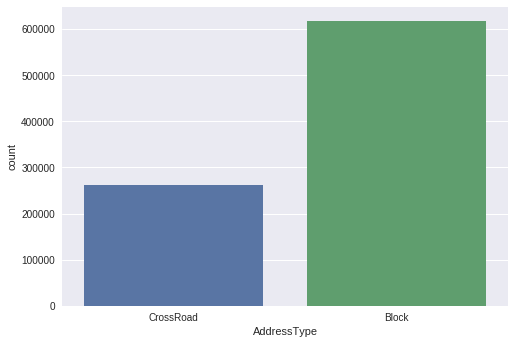

In [7]:
sns.countplot(data=train, x="AddressType")

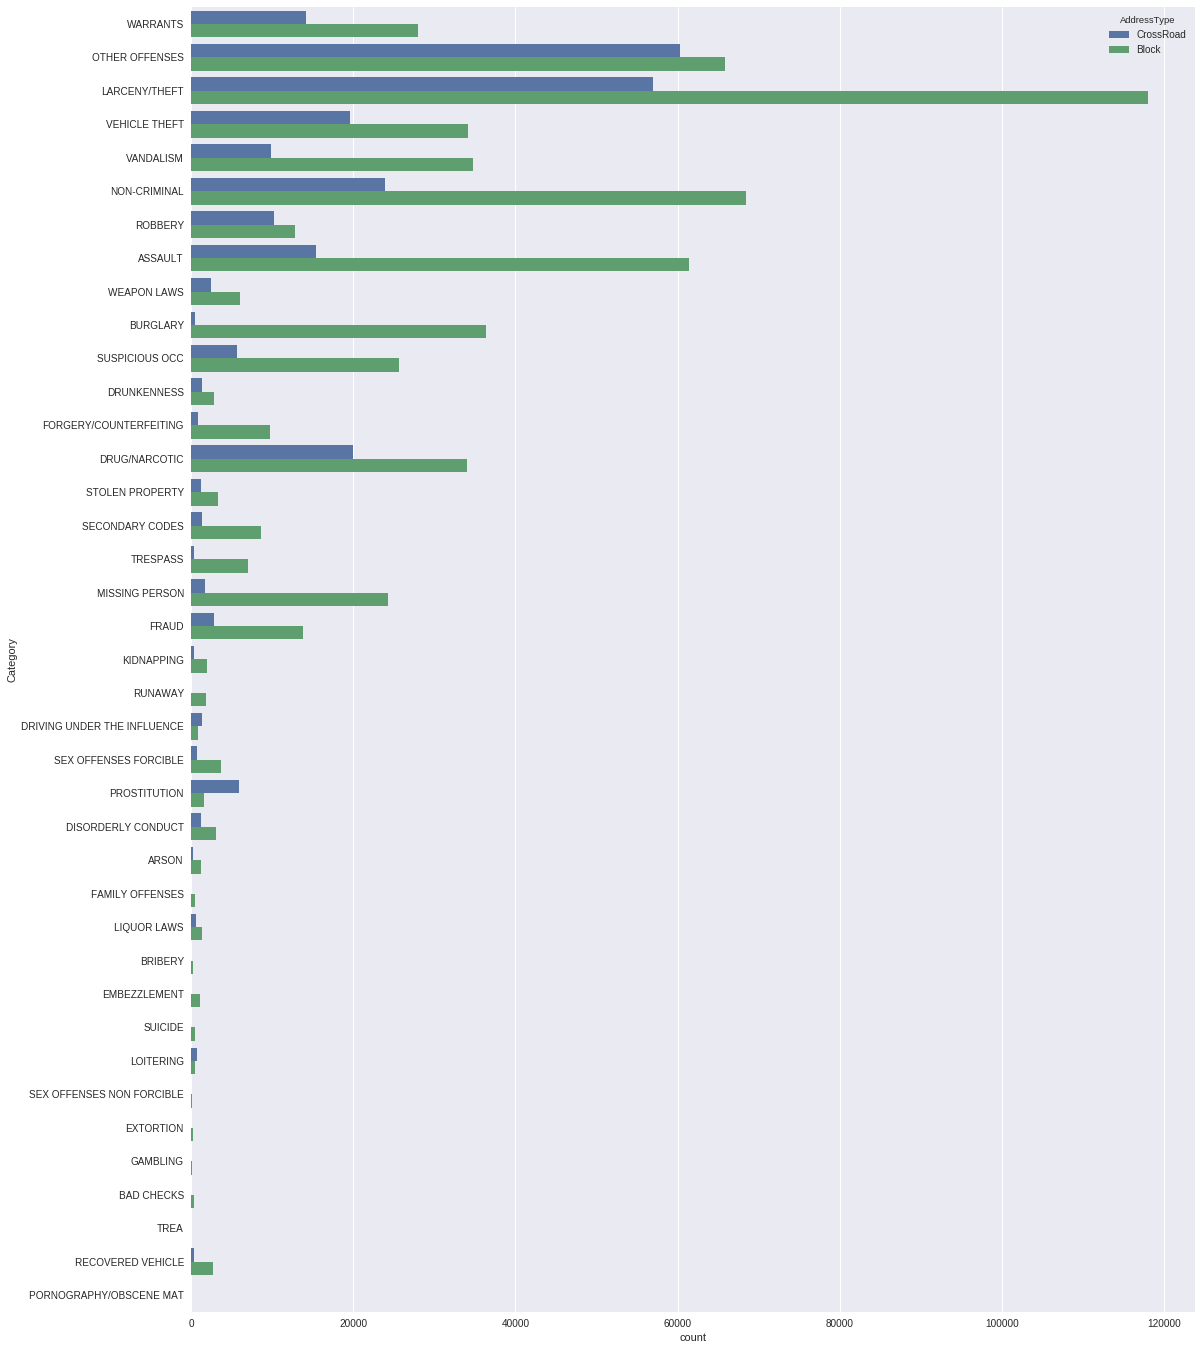

In [8]:
figure, ax = plt.subplots(nrows=1)
figure.set_size_inches(18, 24)

sns.countplot(data=train, y="Category", hue="AddressType", ax=ax)

** Lesson Learned **
  * 주소에 슬래시('/')가 있느냐 없느냐로 주소의 타입(CrossRoad/Block)을 구분할 수 있다.
  * CrossRoad에서 더 빈번하게 일어나는 범죄나, Block에서 더 빈번하게 일어나는 범죄가 있다.

### Explore duplicated address

In [9]:
oak_laguna = train[train["Address"] == "OAK ST / LAGUNA ST"]

print("The number of crimes at OAK ST / LAGUNA ST = {0}".format(len(oak_laguna)))
oak_laguna[["Address", "Category"]].head()

The number of crimes at OAK ST / LAGUNA ST = 45


,Address,Category
0,OAK ST / LAGUNA ST,WARRANTS
1,OAK ST / LAGUNA ST,OTHER OFFENSES
12956,OAK ST / LAGUNA ST,OTHER OFFENSES
27204,OAK ST / LAGUNA ST,LARCENY/THEFT
65580,OAK ST / LAGUNA ST,DRUG/NARCOTIC


In [10]:
laguna_oak = train[train["Address"] == "LAGUNA ST / OAK ST"]

print("The number of crimes at LAGUNA ST / OAK ST = {0}".format(len(laguna_oak)))
oak_laguna[["Address", "Category"]].head()

The number of crimes at LAGUNA ST / OAK ST = 27


,Address,Category
0,OAK ST / LAGUNA ST,WARRANTS
1,OAK ST / LAGUNA ST,OTHER OFFENSES
12956,OAK ST / LAGUNA ST,OTHER OFFENSES
27204,OAK ST / LAGUNA ST,LARCENY/THEFT
65580,OAK ST / LAGUNA ST,DRUG/NARCOTIC


** Lesson Learned **
  * CrossRoad 주소 한정으로, 사실상 같은 위치지만 다른 표현으로 적혀있는 주소가 있다.
  * 이 주소를 하나로 합쳐주면 모델의 정확도를 향상시킬 수 있을 것 같다.

## Reload Dataset

In [11]:
train = pd.read_csv("data/train.csv", parse_dates=["Dates"])

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [12]:
test = pd.read_csv("data/test.csv", parse_dates=["Dates"])

print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Preprocessing

### Parse Dates

In [13]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [14]:
test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

print(test.shape)
test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(884262, 13)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


### Encode DayOfWeek

In [15]:
train_dayofweek = pd.get_dummies(train["DayOfWeek"], prefix="DayOfWeek")
test_dayofweek = pd.get_dummies(test["DayOfWeek"], prefix="DayOfWeek")

train = pd.concat([train, train_dayofweek], axis=1)
test = pd.concat([test, test_dayofweek], axis=1)

dayofweek_columns = list(train_dayofweek.columns)

print("The list of DayOfWeek columns = {0}".format(dayofweek_columns))

print(train.shape)
print(test.shape)

train[["DayOfWeek"] + dayofweek_columns].head()

The list of DayOfWeek columns = ['DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday']
(878049, 22)
(884262, 20)


,DayOfWeek,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,Wednesday,0,0,0,0,0,0,1
1,Wednesday,0,0,0,0,0,0,1
2,Wednesday,0,0,0,0,0,0,1
3,Wednesday,0,0,0,0,0,0,1
4,Wednesday,0,0,0,0,0,0,1


### Encode PdDistrict

In [16]:
train_pd_district = pd.get_dummies(train["PdDistrict"], prefix="PdDistrict")
test_pd_district = pd.get_dummies(test["PdDistrict"], prefix="PdDistrict")

train = pd.concat([train, train_pd_district], axis=1)
test = pd.concat([test, train_pd_district], axis=1)

pd_district_columns = list(train_pd_district.columns)

print("The List of PdDistrict columns = {0}".format(pd_district_columns))

print(train.shape)
print(test.shape)

train[["PdDistrict"] + pd_district_columns].head()

The List of PdDistrict columns = ['PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']
(878049, 32)
(884262, 30)


,PdDistrict,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,NORTHERN,0,0,0,0,1,0,0,0,0,0
1,NORTHERN,0,0,0,0,1,0,0,0,0,0
2,NORTHERN,0,0,0,0,1,0,0,0,0,0
3,NORTHERN,0,0,0,0,1,0,0,0,0,0
4,PARK,0,0,0,0,0,1,0,0,0,0


### Convert all Dates-minute 30 if the current value of Dates-minute is 0

In [17]:
train["Dates-minute_clean"] = train["Dates-minute"]
test["Dates-minute_clean"] = test["Dates-minute"]

train.loc[train["Dates-minute_clean"] == 30, "Dates-minute_clean"] = 0

print(train.shape)
train[["Dates-minute", "Dates-minute_clean"]].head()

(878049, 33)


,Dates-minute,Dates-minute_clean
0,53,53
1,53,53
2,33,33
3,30,0
4,30,0


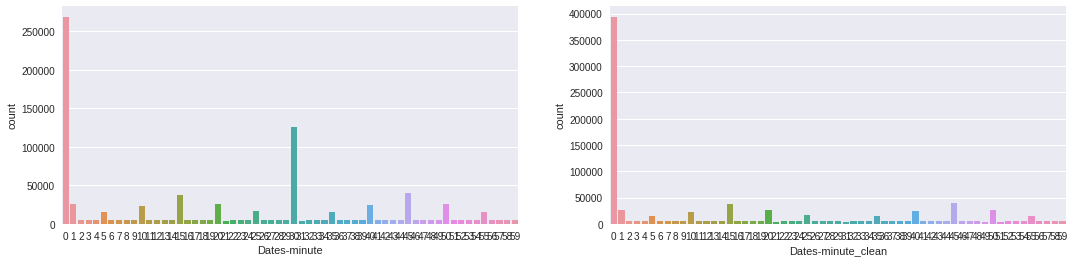

In [18]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18, 4)

sns.countplot(data=train, x="Dates-minute", ax=ax1)
sns.countplot(data=train, x="Dates-minute_clean", ax=ax2)

### Create the new column named 'AddressType' from the Address column

In [19]:
train["Address_CrossRoad"] = train["Address"].str.contains("/")
test["Address_CrossRoad"] = test["Address"].str.contains("/")

print(train.shape)
print(test.shape)

train[["Address", "Address_CrossRoad"]].head()

(878049, 34)
(884262, 32)


,Address,Address_CrossRoad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


### Convert all address values to 'Others' if the total number of address is less than 100

In [20]:
major_address_list = train["Address"].value_counts()
major_address_list = major_address_list[major_address_list >= 100]
major_address_list = major_address_list.index

print("The number of major address = {0}".format(len(major_address_list)))
major_address_list[:5]

The number of major address = 1637


Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '900 Block of MARKET ST'],
      dtype='object')

In [21]:
train["Address_clean"] = train["Address"]
test["Address_clean"] = test["Address"]

train.loc[~train["Address"].isin(major_address_list), "Address_clean"] = "Others"
test.loc[~test["Address"].isin(major_address_list), "Address_clean"] = "Others"

print(train.shape)
print(test.shape)

train[["Address", "Address_clean"]].head()

(878049, 35)
(884262, 33)


,Address,Address_clean
0,OAK ST / LAGUNA ST,Others
1,OAK ST / LAGUNA ST,Others
2,VANNESS AV / GREENWICH ST,Others
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,Others


### Merge duplicated address

In [22]:
crossroad = train[train["Address_clean"].str.contains("/")]

print(crossroad.shape)
crossroad[["Address", "Address_clean", "Category"]].head()

(107352, 35)


,Address,Address_clean,Category
12,TURK ST / JONES ST,TURK ST / JONES ST,VANDALISM
13,FILLMORE ST / GEARY BL,FILLMORE ST / GEARY BL,LARCENY/THEFT
16,EDDY ST / JONES ST,EDDY ST / JONES ST,ROBBERY
57,HARRISON ST / 10TH ST,HARRISON ST / 10TH ST,LARCENY/THEFT
58,GEARY BL / LAGUNA ST,GEARY BL / LAGUNA ST,LARCENY/THEFT


In [23]:
crossroad_list = crossroad["Address_clean"].unique()

print("The number of cross road (Before) = {0}".format(len(crossroad_list)))
crossroad_list[:5]

The number of cross road (Before) = 477


array(['TURK ST / JONES ST', 'FILLMORE ST / GEARY BL',
       'EDDY ST / JONES ST', 'HARRISON ST / 10TH ST',
       'GEARY BL / LAGUNA ST'], dtype=object)

In [24]:
from tqdm import tqdm

for address in tqdm(crossroad_list):
    address_split = address.split("/")
    reverse_address = address_split[1].strip() + " / " + address_split[0].strip()
    
    train.loc[train["Address_clean"] == reverse_address, "Address_clean"] = address
    test.loc[test["Address_clean"] == reverse_address, "Address_clean"] = address

100%|██████████| 477/477 [00:51<00:00,  9.27it/s]


In [25]:
crossroad = train[train["Address_clean"].str.contains("/")]
crossroad_list = crossroad["Address_clean"].unique()

print("The number of cross road (After) = {0}".format(len(crossroad_list)))
crossroad_list[:5]

The number of cross road (After) = 322


array(['JONES ST / TURK ST', 'GEARY BL / FILLMORE ST',
       'JONES ST / EDDY ST', '10TH ST / HARRISON ST',
       'LAGUNA ST / GEARY BL'], dtype=object)

## Score

In [26]:
feature_names = ["X", "Y", 'Address_CrossRoad']
feature_names = feature_names + pd_district_columns
feature_names = feature_names + ["Dates-hour", "Dates-minute_clean"]

feature_names

['X',
 'Y',
 'Address_CrossRoad',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN',
 'Dates-hour',
 'Dates-minute_clean']

In [27]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(878049, 15)


,X,Y,Address_CrossRoad,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Dates-hour,Dates-minute_clean
0,-122.425892,37.774599,True,0,0,0,0,1,0,0,0,0,0,23,53
1,-122.425892,37.774599,True,0,0,0,0,1,0,0,0,0,0,23,53
2,-122.424363,37.800414,True,0,0,0,0,1,0,0,0,0,0,23,33
3,-122.426995,37.800873,False,0,0,0,0,1,0,0,0,0,0,23,0
4,-122.438738,37.771541,False,0,0,0,0,0,1,0,0,0,0,23,0


In [28]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(884262, 15)


,X,Y,Address_CrossRoad,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Dates-hour,Dates-minute_clean
0,-122.399588,37.735051,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23,59
1,-122.391523,37.732432,True,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23,51
2,-122.426002,37.792212,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23,50
3,-122.437394,37.721412,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23,45
4,-122.437394,37.721412,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23,45


In [29]:
label_name = "Category"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

### Concatenate current features and the address (use CSR matrix)

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train["Address_clean"])

train["Address_clean_encode"] = label_encoder.transform(train["Address_clean"])
test["Address_clean_encode"] = label_encoder.transform(test["Address_clean"])

print(train.shape)
print(test.shape)

train[["Address", "Address_clean", "Address_clean_encode"]].head()

(878049, 36)
(884262, 34)


,Address,Address_clean,Address_clean_encode
0,OAK ST / LAGUNA ST,Others,1416
1,OAK ST / LAGUNA ST,Others,1416
2,VANNESS AV / GREENWICH ST,Others,1416
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST,396
4,100 Block of BRODERICK ST,Others,1416


In [31]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

one_hot_encoder.fit(train[["Address_clean_encode"]])

train_address = one_hot_encoder.transform(train[["Address_clean_encode"]])
test_address = one_hot_encoder.transform(test[["Address_clean_encode"]])

print(train_address.shape)
print(test_address.shape)

train_address

(878049, 1483)
(884262, 1483)


<878049x1483 sparse matrix of type '<class 'numpy.float64'>'
	with 878049 stored elements in Compressed Sparse Row format>

In [32]:
from scipy.sparse import hstack

X_train = hstack((X_train.astype(np.float32), train_address))

print(X_train.shape)
X_train

(878049, 1498)


<878049x1498 sparse matrix of type '<class 'numpy.float64'>'
	with 5090124 stored elements in COOrdinate format>

In [ ]:
from scipy.sparse import hstack

X_test = hstack((X_test.astype(np.float32), test_address))

print(X_test.shape)
X_test

(884262, 1498)


<884262x1498 sparse matrix of type '<class 'numpy.float64'>'
	with 5305869 stored elements in COOrdinate format>

### Evaluate score using XGBoost

In [ ]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

seed = 37

model = xgb.XGBClassifier(objective='multi:softprob',
                          n_estimators=45,
                          learning_rate=1.0,
                          max_depth=6,
                          max_delta_step=1,
                          nthread=-1,
                          seed=seed)

%time score = cross_val_score(model, X_train, y_train, scoring='log_loss', cv=5).mean()
score = score * -1.0

print("Score = {0:.5f}".format(score))

/home/shaynekang/.pyenv/versions/3.5.3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Save the model

In [ ]:
import pickle

%time model.fit(X_train, y_train)

pickle.dump(model, open("models/xgboost.p", "wb"))

In [ ]:
model = pickle.load(open("models/xgboost.p", "rb"))
model

## Predict

In [ ]:
predictions = model.predict_proba(X_test)

predictions = predictions.astype(np.float32)

print(predictions.shape)
predictions[:5]

In [ ]:
submission = pd.read_csv("data/sampleSubmission.csv", index_col="Id")

for i, column in enumerate(submission.columns):
    submission[column] = predictions[:, i]

print(submission.shape)
submission.head()

In [ ]:
submission.to_csv("submissions/to-the-top-10.csv")